# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"
### BEGINNER LEVEL TASK
### TASK 3-> Music Recommendation System:

#### Dataset link : https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data 

# Importing Libraries

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing datasets

In [ ]:
#IMPORTING DATASETS
ntr = 7000
nts = 3000
data_path=r'train.csv'
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"songs.csv")
members = pd.read_csv(r"members.csv")

### Train dataset

In [ ]:
train.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [ ]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
4298,wkgVJmHB4Ph44npptigdhK/OSHv37calS3ydn9/rlfA=,QD4a1I68SDSNd108BzHUtZppX4EQ4nJ6rNPuhkSVnAQ=,my library,Local playlist more,local-library,1
3108,EEuu7Qye5Sin7H1/YjvW9H0yQCFxKdQVnBf2l9HQnaU=,IomyG8OwXU9lWvede4KdHxtUZ+eppEdusnOCDDok36g=,my library,Local playlist more,local-playlist,1
6880,IixtUhLMMgTXCVFatKZY+OsLP4UipmdATjmR01BB5is=,su5MLsBWUQaNe6GwaQua80xNF+cUc8fFtFaFtt6kW8Q=,my library,Local playlist more,local-library,1
5401,VokSdD8ioKBOtGKCn8bZddrEaAO44kYUYO+FeD5f+AM=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,1
2381,67rPKrvEGak0BS4XRPmQSCSWDw85Vt6EFza1YeJOOco=,MC8uE9Zl4QEQClXhPeDD8mDNnPqDT8RLgnbAOvHvjws=,my library,Local playlist more,local-library,1
2781,tXwPeCErLeASUmwHVf5H+hsAk0GOBnqvwQt8hCL01NE=,+aX7U2Gp43qzNSrlp9aFZPYwLkwHvP+UoL1BgHwhWho=,my library,Local playlist more,local-library,0
5274,CZj8yzXkLr5jdfRAhkQ3TqnGfWZzPIPaPT4lGzLZdHg=,i0+wMpQck+GoQZcVGzVmDYZziUPWSzFkOCLYOGQZ1GE=,discover,Discover Genre,online-playlist,0
3038,NPl5iTh9Sf1YP063X9gKZiWxJJ/C+VKW5eL3+ogUyY4=,EvM2QBlYdQ5x4yneGwfavgf91iJaxoC8vq+OzjL6I3I=,my library,Local playlist more,local-library,1
995,/HHdYSYXfoNOH5XkfnapPrRllaEzVVzuu/c2X6fJj/U=,mxSDARJDB08kFRySUX7aqGLgQtxM4Uco3AXsjhoovfc=,my library,Local playlist more,local-library,1
1488,WF0+lTYUZrHn9eh04y9+nz3ZSuxP9acJacIbX8y3ctA=,+EhEFo285sEF1uoMgOHoqG13i7IQT9TxSuZvvoiehbo=,my library,Local playlist more,local-library,1


In [ ]:
train.shape

(7000, 6)

In [ ]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [ ]:
train.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [ ]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

### Songs datasets

In [ ]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520.0,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220.0,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793.0,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623.0,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629.0,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [ ]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
78036,neNQnEdxjop20vgLs0BYXp6/GS9VtCfZsAYgTqgYja4=,203650.0,465,潘瑋柏 (Will Pan),Will Pan| Jia Song Ji,NaN,3.0
422220,bSspa3KGIQDl9gleyUKrHAPVt7zZlKmqsg5nst+S4Gg=,316255.0,2122,Sarah Vaughan,Nacio Herb Brown| Arthur Freed,NaN,-1.0
242766,U0rhkiu+8eUlIOdF9jm8u/UvJI58jH6SD48+o8LcxdM=,231456.0,NaN,Yucca,Christian Mertel| Peter Georg Graf| Matthias S...,NaN,52.0
315752,Y6bdbgu2fyQ742hVQsmNcwRbG8M4mXTD3bnp+yNggkE=,120320.0,444,Baek Z Young,NaN,NaN,31.0
95101,g4EnYCq7URLFC2SHfjpdw1ViV/iwJefv291t7iq+K8Q=,284108.0,465,謝沛恩 (Aggie),林旂鋒,Casey Khoo,3.0
38070,4MyxIR9nKwhJs0C/UcGzAHDFBcWI2yadq7vAbK3AvmE=,195792.0,786,紓壓輕鬆聽,JOHN POWELL,NaN,-1.0
47730,xG7lHgC5zmQ3KkZW8UzQewkQN5Whrd6tBcCpMGElE+c=,251611.0,1609,Zedd,Jon Bellion|Anton Zaslavski|Tim James|Antonina...,NaN,52.0
297967,XdlmrepPZmpwfrewzPiDolXa5iwLJkq+p7h5w7Qm47I=,224444.0,1609,AVTechNO!,avtechno,avtechno,17.0
32524,+lcuGLeUlP2ErzpsLg6FVUh7tZ2cVlbV/UdyOkbyfyA=,394762.0,465,Various Artists,Caron Wheeler| Beresford Romeo| Jazzie B| Caro...,NaN,52.0
458690,06w3SVdbcO+w/M6lwBiLZRpBNoQlOwFR2my7GNFzapE=,218044.0,NaN,Andy| Yumiko & Mu-ray (ANDY| ユミコ & mu-ray),大石 憲一郎,NaN,17.0


In [ ]:
songs.shape

(524453, 7)

In [ ]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [ ]:
songs.describe()

,song_length,language
count,5.244520e+05,524452.000000
mean,2.474632e+05,29.719725
std,1.466373e+05,23.937864
min,1.079000e+03,-1.000000
25%,1.928880e+05,3.000000
50%,2.308290e+05,52.000000
75%,2.751210e+05,52.000000
max,1.096911e+07,59.000000


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524453 entries, 0 to 524452
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   song_id      524453 non-null  object 
 1   song_length  524452 non-null  float64
 2   genre_ids    509328 non-null  object 
 3   artist_name  524452 non-null  object 
 4   composer     291453 non-null  object 
 5   lyricist     110124 non-null  object 
 6   language     524452 non-null  float64
dtypes: float64(2), object(5)
memory usage: 28.0+ MB


In [ ]:
songs.isnull().sum()

song_id             0
song_length         1
genre_ids       15125
artist_name         1
composer       233000
lyricist       414329
language            1
dtype: int64

### Members datasets

In [ ]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [ ]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
15400,JkhU1zrF4WDffylwWUZjncwy+CKwuZqN1BH8BISmoTA=,1,0,NaN,4,20161226,20161229
1811,eTYvdgC9GdkY1FzcfJDDc40p3qRsDYDGwEIGY2KBe3Y=,1,0,NaN,7,20161005,20171004
20809,0DMKcvrdoZf5nBIYKIJvC2cYoLYaYooY2VT3WytypAI=,1,0,NaN,7,20140330,20170917
22272,PQZPC6xbnDvHt/+6WBRsrm9Zwf/thoEVH/EtKmgMv80=,1,0,NaN,7,20101028,20171008
20619,rYeW94G1QBk5V4AiAznjIbhW9kM/FxjuaUXOPFYQmt0=,6,38,male,9,20060119,20170930
14821,2fCaFUNCQAD0NDCNYOYx2PpuhDC0eozNLW/ntqpUQxU=,14,22,female,3,20130110,20170612
1181,rW1oRbqqF0a5TPMFV3r0TO2wT+YBbD7SfKcoV3ZCqZo=,1,0,NaN,7,20160312,20171004
33789,OS/Cmfr1gFh+8EuJfgfBYB2L5MwkaeQXFUa+iaVoIbU=,22,0,NaN,3,20130819,20170917
6288,U7MGbwyl2fCH7MZcOyCesKkp1izWZBIJuEmFn7Y7qic=,5,36,male,9,20110826,20180302
34176,JCvlb5sDNUSmeCFWsuGWuY7rgadcEpTjCMCAF+RWT1w=,1,0,NaN,4,20170103,20170612


In [ ]:
members.shape

(34403, 7)

In [ ]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [ ]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

# Data Visualization

<Axes: xlabel='source_system_tab', ylabel='count'>

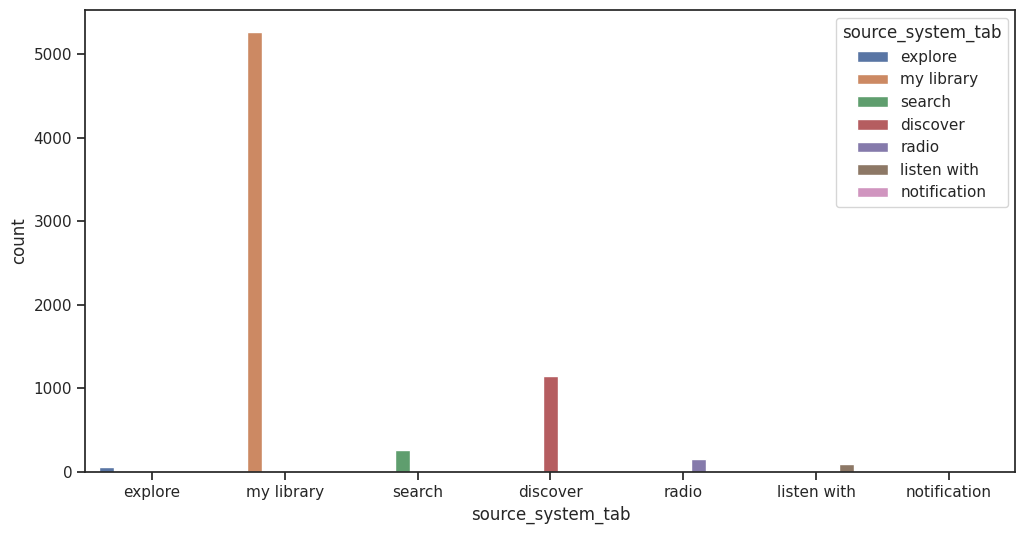

In [ ]:
#DATA VISUALIZATION
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

<Axes: xlabel='source_system_tab', ylabel='count'>

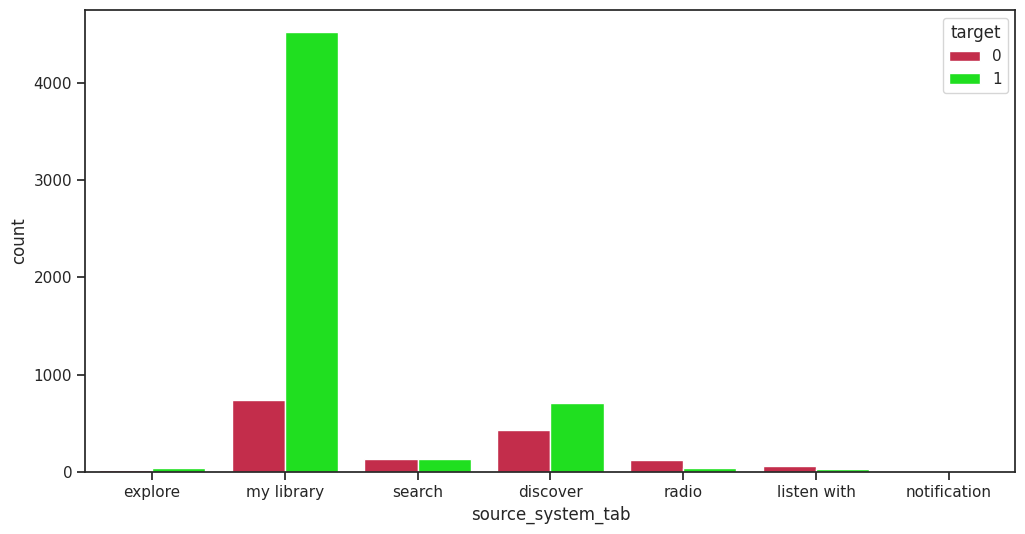

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette=['crimson','lime'],hue=train['target'])

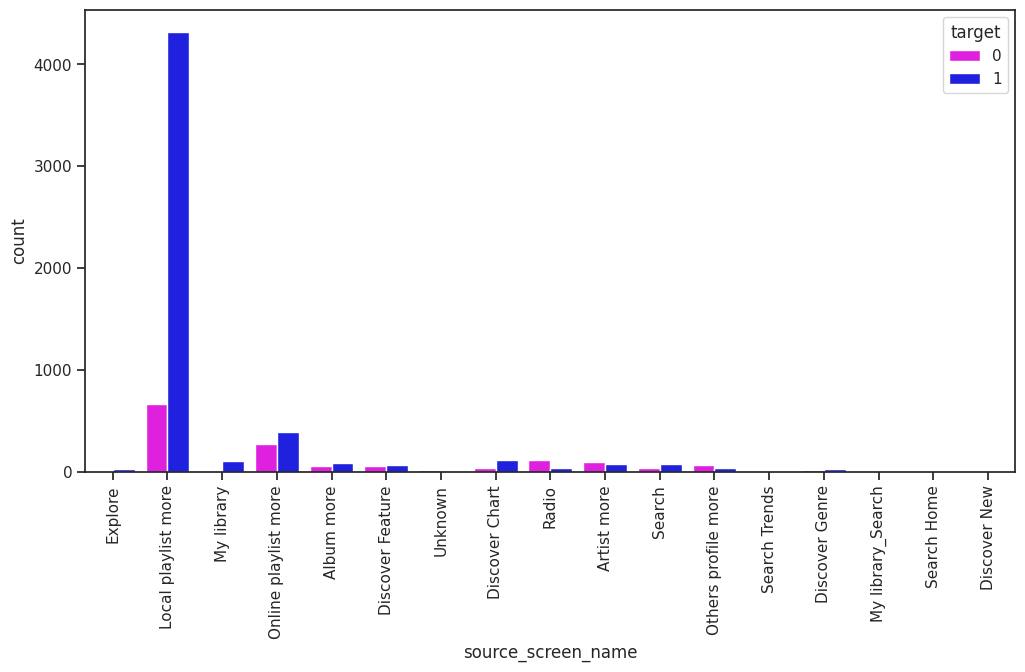

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['magenta','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()


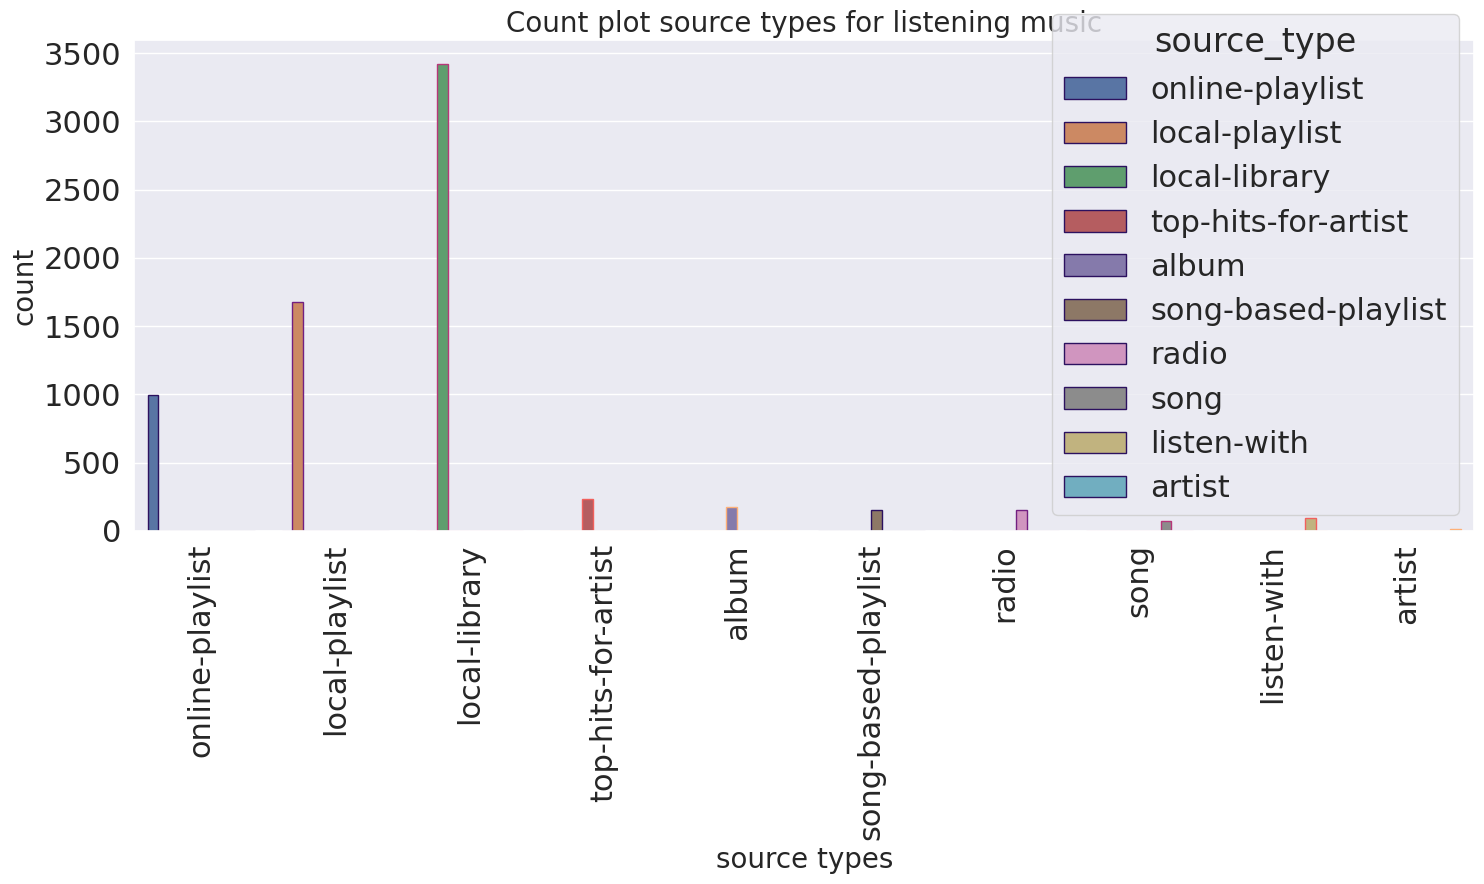

In [ ]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='vertical')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

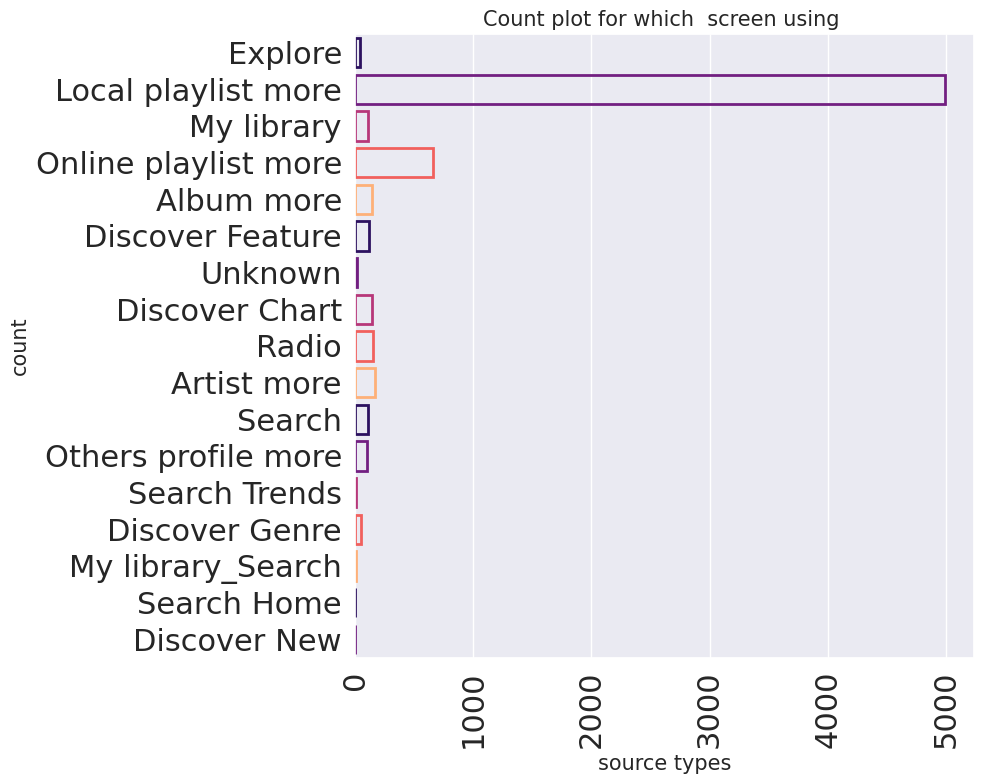

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='vertical')
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()

In [ ]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

In [ ]:
# Function to plot histograms for categories

def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

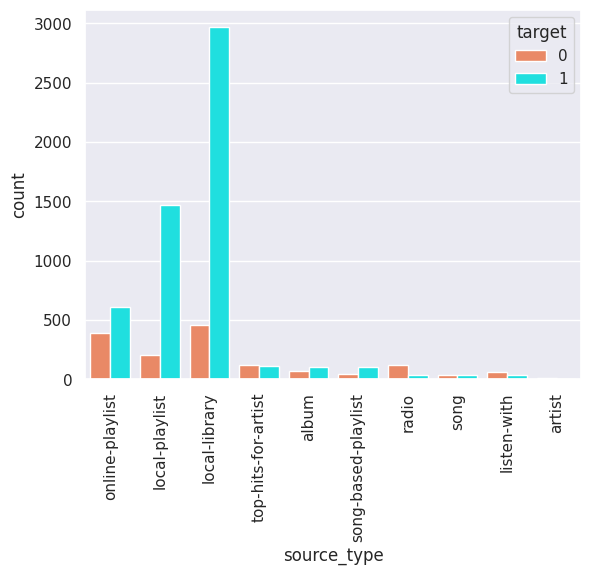

In [ ]:
sns.countplot(x = train['source_type'],palette=['coral','cyan'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

# Now doing some visualiaztion in members.csv

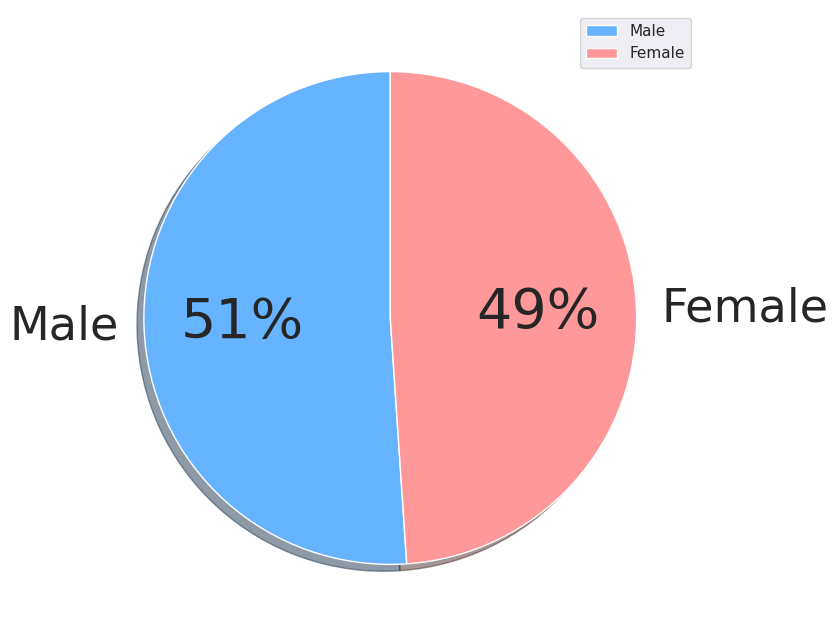

In [ ]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

<Axes: xlabel='language', ylabel='count'>

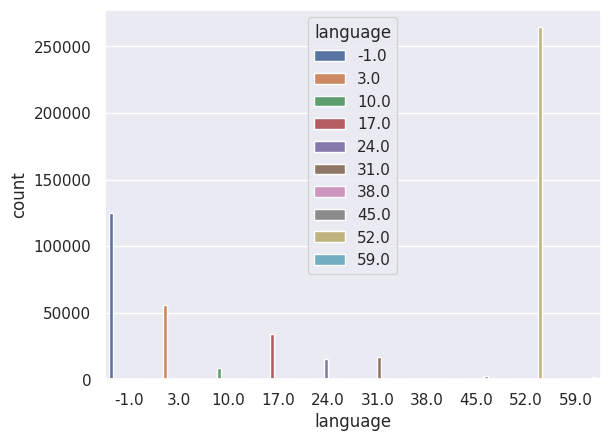

In [ ]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

Most of the people who used to listen songs are from '1'- labelled city.

Some cities have very few people who prefer listening music via this music app

# Doing stats test on members.csv

<ipython-input-69-c2bce3735f8b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(members.registration_init_time,color='orange')


Text(0.5, 1.0, 'PDF for Registration')

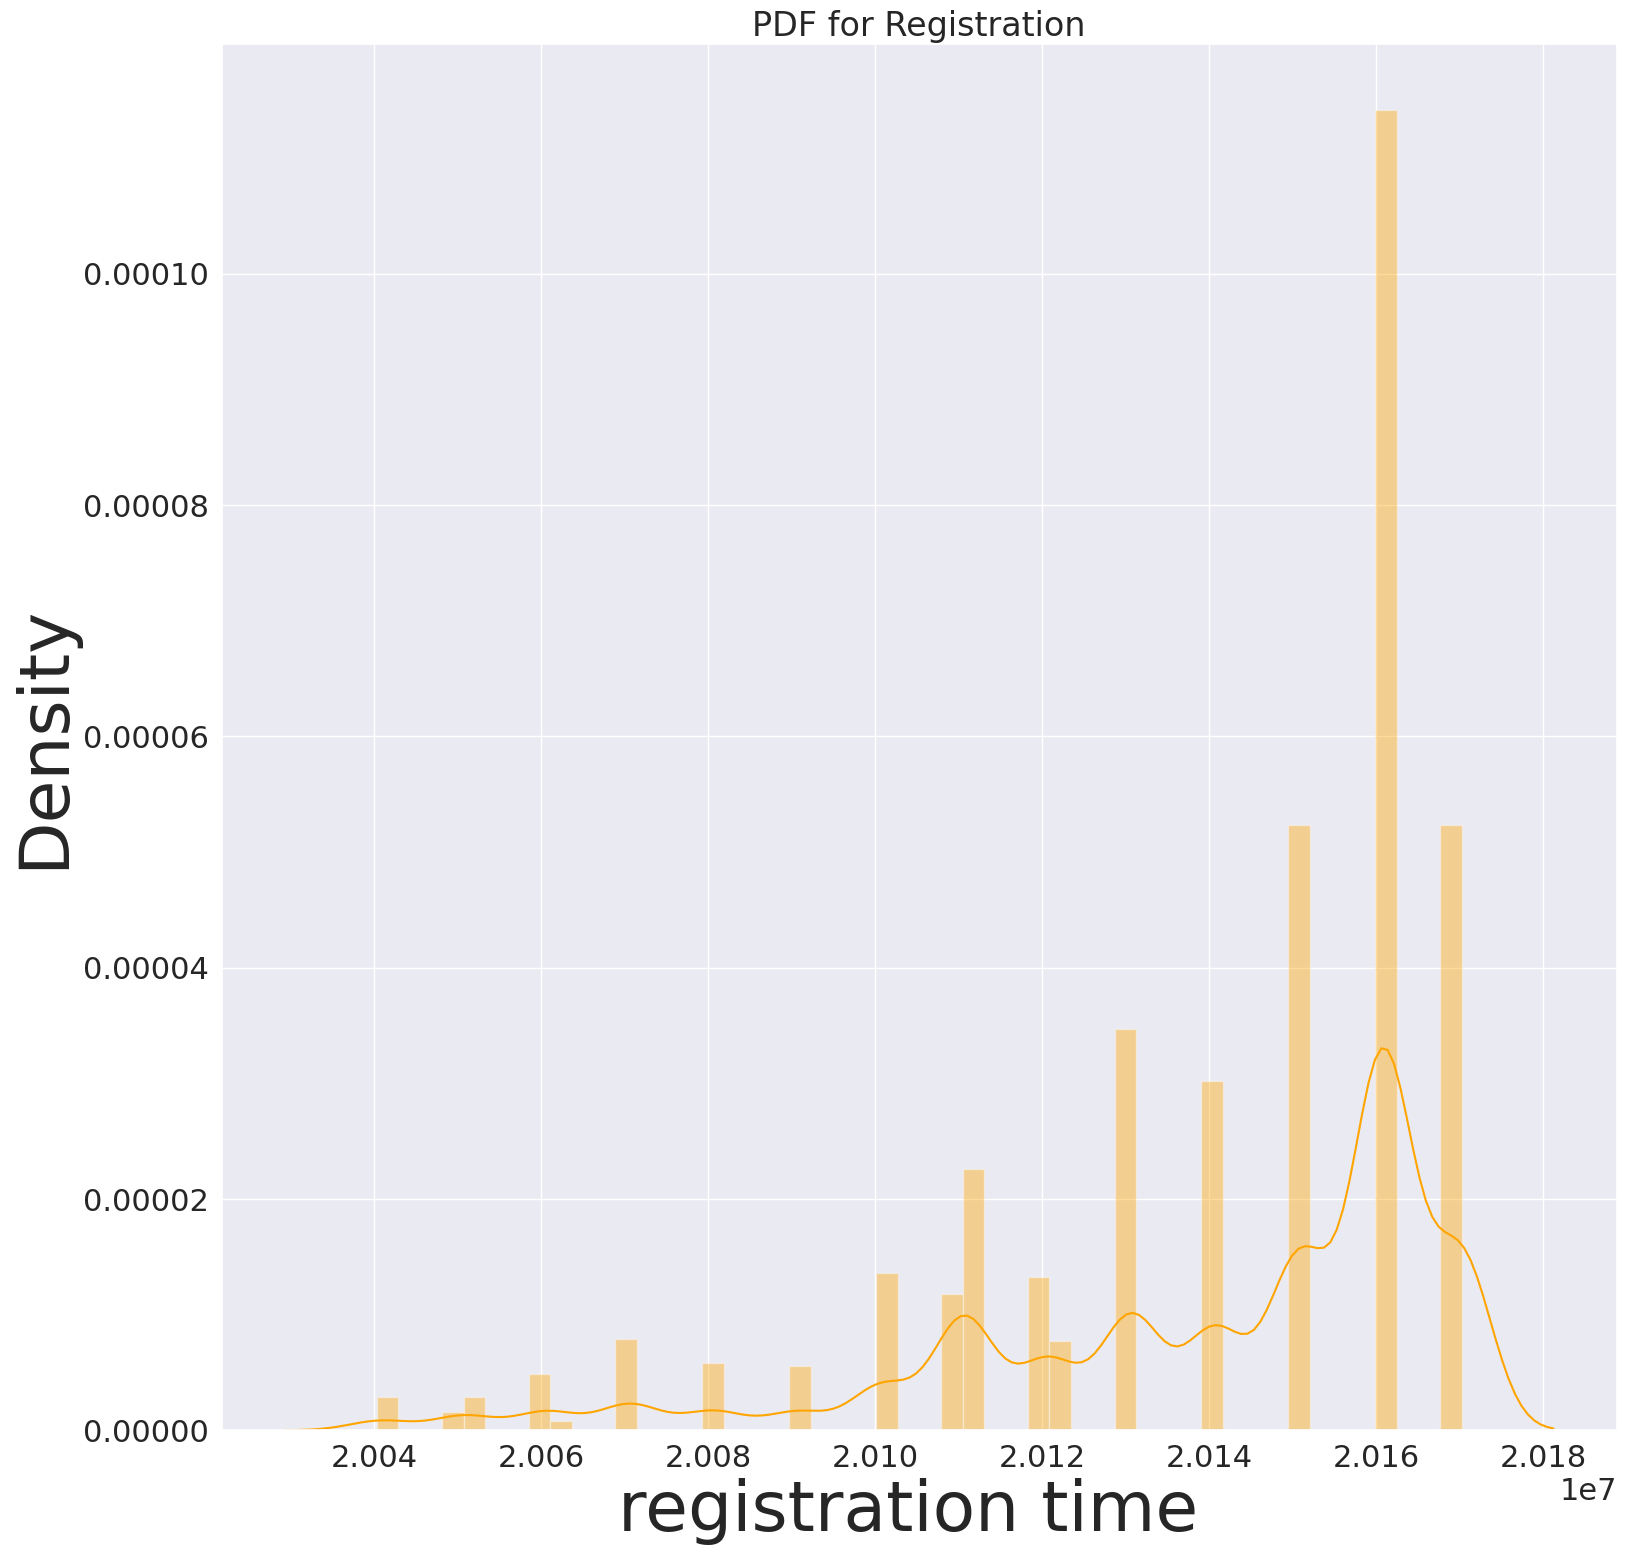

In [ ]:
plt.figure(figsize = (18, 18)) 
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

We can see that initially people were not fond of listening music but after certain amount time people started to listen music and registered themselves to this music app

In [ ]:
# Function to plot PDF and CDf.

def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='purple')
    plt.title('PDF for age')
  sns.set(font_scale=2)

<ipython-input-70-aa9f4228bff9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='purple')


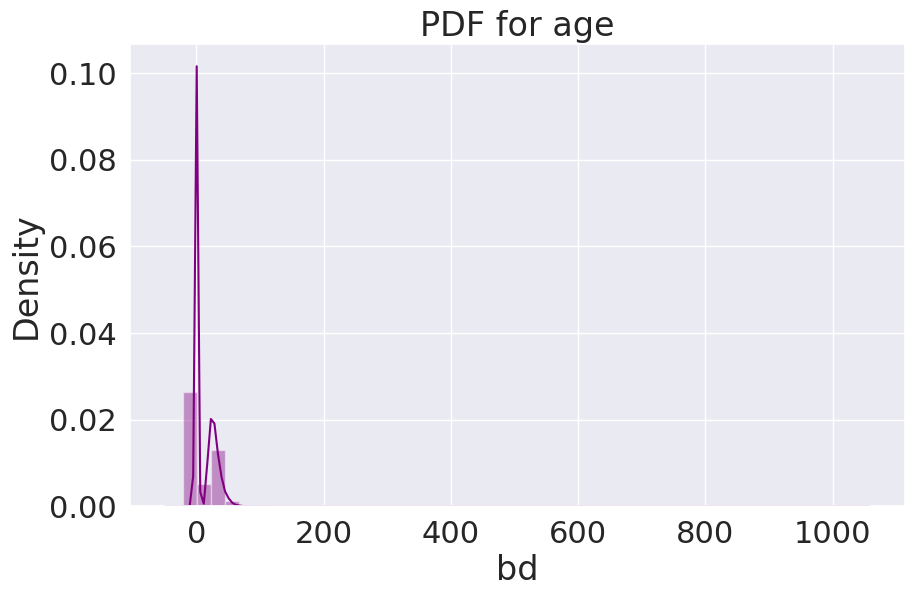

In [ ]:
plot_pdf_cdf(members['bd'], False)

<ipython-input-70-aa9f4228bff9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')


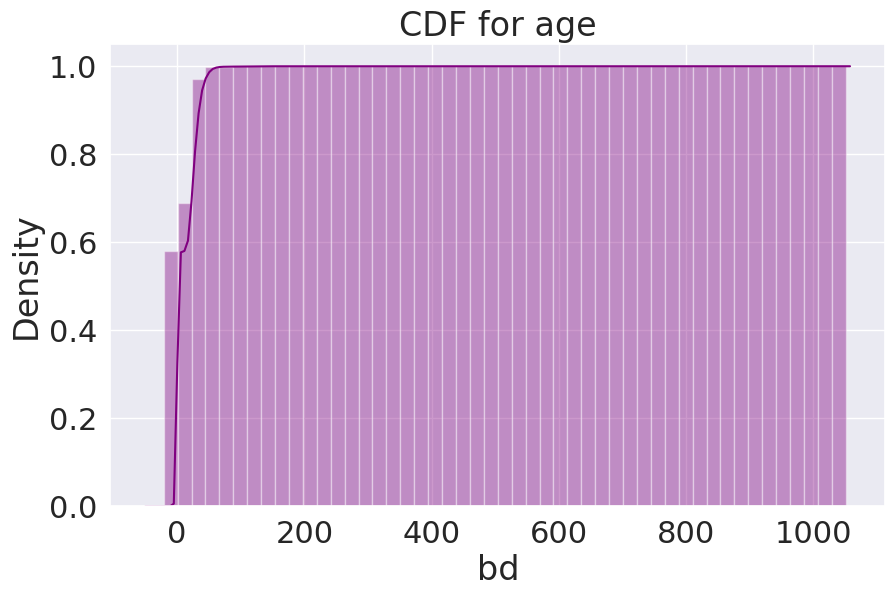

In [ ]:
plot_pdf_cdf(members['bd'], True)
plt.show()

In [ ]:
np.percentile(members['bd'].values, 98)

47.0


1. We can also observe via above CDF that almost 99% values are below 50. There are also some outliers like 1030, -38, -43, 1051, etc. As age cannot be negative value or more than 1000 for humans

In [ ]:
#DATA PREPROCESSING AND CLEANING
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [ ]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [ ]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [ ]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))


In [ ]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [ ]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')


In [ ]:
train = train.fillna(-1)
test = test.fillna(-1)


In [ ]:
import gc
del members, songs; gc.collect();

In [ ]:
colm = list(train.columns)
colm.remove('target')

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 246.00it/s]


In [ ]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Model Building

In [ ]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

# Trying out basic classification models

In [ ]:
#TRYING OUT BASIC CLASSIFICATION MODELS
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

### Predicting training score & accuracy on test data using 

### LogisticRegression & RandomForestClassifier 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy on test data for the model 78.33333333333333


In [ ]:
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy on test data for the model 79.53333333333333


# Prediction using lightgbm

In [ ]:
#PREDICTION USING LIGHTGBM
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [ ]:
p_test = model1.predict(X_test)

# Printing accuracy of lgbm model on test data

In [ ]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 77.566667%
